#LDA all word combinations model

[0.49783631564926595, 0.48298703699854934, 0.48950401817845757, 0.47110578576649065, 0.4799407197230098, 0.47539762484856435, 0.4623539607971023, 0.4579749546688664, 0.4689305048801792, 0.456584018373681, 0.4552260816186422, 0.44550630342171293, 0.44776431122094207, 0.4449267901294906, 0.4409245641305278, 0.43875164907574266, 0.4342950317595661, 0.4383327254203082, 0.4318931546022716, 0.43086570271940927]


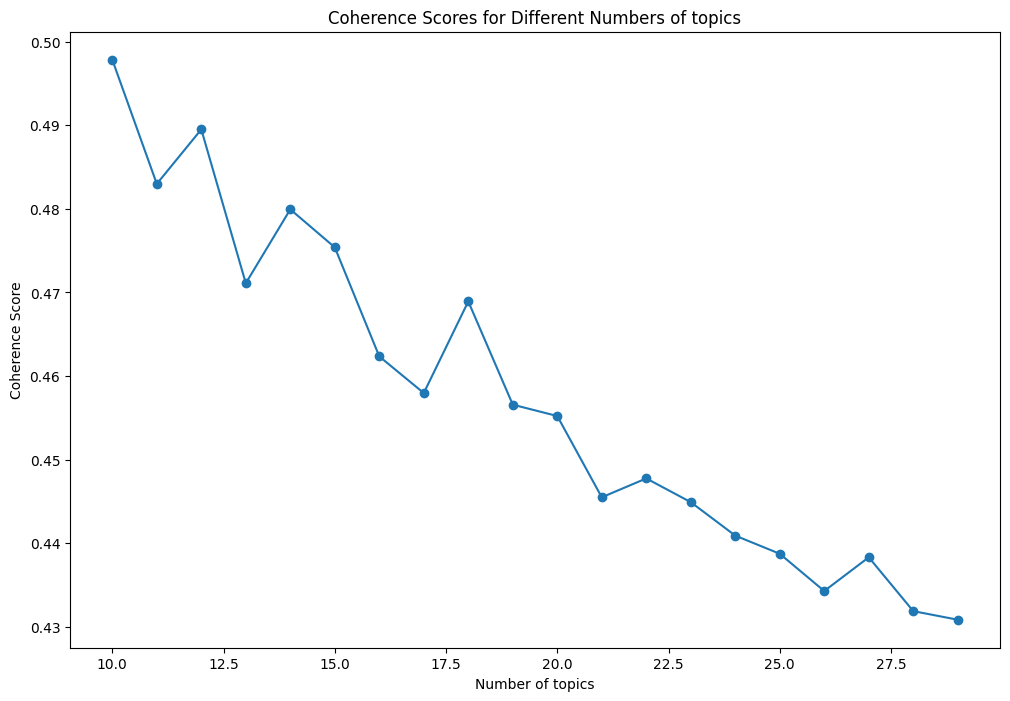

In [8]:
# dataset for the unigrams all word combinations
uni_all = df

# Set the number of runs to obtain an average coherence score
runs = 10

# Create a dictionary
id2word = corpora.Dictionary(uni_all['cleanned_text'])

# Filter out words that occur in less than 5 documents or more than 20% of the documents
id2word.filter_extremes(no_below=5, no_above=0.2)

# Create a corpus
corpus = [id2word.doc2bow(doc) for doc in uni_all['cleanned_text']]

# Set the range of cluster numbers to evaluate
cluster_range = range(10, 30)

coherence_scores = []
avg_coherence_scores = []  # List to store average coherence scores
models = []

# Calculate coherence scores for each cluster number
for num_clusters in cluster_range:
    random.seed(42)
    model_coherences = []
    for _ in range(runs):
        # Initialize the LDA model with
        model = LdaModel(corpus=corpus, num_topics=num_clusters)

        # Calculate the coherence score of the model
        coherencemodel = CoherenceModel(model=model, texts=uni_all['cleanned_text'], dictionary=id2word, coherence='c_v')
        coherence_scores.append(coherencemodel.get_coherence())

        # Calculate coherence per run
        model_coherences.append(coherencemodel.get_coherence())

    # Calculate average coherence
    avg_coherence = sum(model_coherences) / runs

    # Append average coherence to separate list
    avg_coherence_scores.append(avg_coherence)
    models.append(model)

print(avg_coherence_scores)

# Visualize the coherence scores in a plot
plt.figure(figsize=(12, 8))
plt.plot(cluster_range, avg_coherence_scores, marker='o')
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of topics")
plt.show()

##Grid research for the alpha and eta

In [16]:
# Define the alpha and eta values to evaluate
alpha_range = [0.01, 0.05, 0.1, 0.5,1 ,5]
eta_range = [0.01, 0.05, 0.1, 0.5, 1, 5]

best_coherence = -1.0
best_alpha = None
best_eta = None

# Iterate over all combinations of alpha and eta
for alpha in alpha_range:
    for eta in eta_range:
        model = LdaModel(corpus=corpus, num_topics=10, id2word=id2word, alpha=alpha, eta=eta)
        coherence_model = CoherenceModel(model=model, texts=uni_all['cleanned_text'], dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model.get_coherence()

        print("Alpha:", alpha, "Eta:", eta, "Coherence Score:", coherence_score)

        # Check if this is the best coherence score so far
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_alpha = alpha
            best_eta = eta

# Print the best coherence score and corresponding alpha and eta values
print("Best Coherence Score:", best_coherence)
print("Best Alpha:", best_alpha)
print("Best Eta:", best_eta)

Alpha: 0.01 Eta: 0.01 Coherence Score: 0.5235986361114227


Alpha: 0.01 Eta: 0.05 Coherence Score: 0.4934856697330285


Alpha: 0.01 Eta: 0.1 Coherence Score: 0.499242965835354


Alpha: 0.01 Eta: 0.5 Coherence Score: 0.4953230148983409


Alpha: 0.01 Eta: 1 Coherence Score: 0.5069765779393075


Alpha: 0.01 Eta: 5 Coherence Score: 0.48974776228158284


Alpha: 0.05 Eta: 0.01 Coherence Score: 0.5155643997072354


Alpha: 0.05 Eta: 0.05 Coherence Score: 0.5141749689177926


Alpha: 0.05 Eta: 0.1 Coherence Score: 0.46322056784831733


Alpha: 0.05 Eta: 0.5 Coherence Score: 0.49354493190624743


Alpha: 0.05 Eta: 1 Coherence Score: 0.5070779004723277


Alpha: 0.05 Eta: 5 Coherence Score: 0.4915492196757884


Alpha: 0.1 Eta: 0.01 Coherence Score: 0.5013555804975608


Alpha: 0.1 Eta: 0.05 Coherence Score: 0.48512670341451763


Alpha: 0.1 Eta: 0.1 Coherence Score: 0.4962175386298366


Alpha: 0.1 Eta: 0.5 Coherence Score: 0.4841688356597782


Alpha: 0.1 Eta: 1 Coherence Score: 0.46133685041140426


Alpha: 0.1 Eta: 5 Coherence Score: 0.4877482996059916


Alpha: 0.5 Eta: 0.01 Coherence Score: 0.582470433799591


Alpha: 0.5 Eta: 0.05 Coherence Score: 0.5995565790926225


Alpha: 0.5 Eta: 0.1 Coherence Score: 0.594720239932635


Alpha: 0.5 Eta: 0.5 Coherence Score: 0.5961564341195159


Alpha: 0.5 Eta: 1 Coherence Score: 0.585361833977057


Alpha: 0.5 Eta: 5 Coherence Score: 0.6082601714607708


Alpha: 1 Eta: 0.01 Coherence Score: 0.6061362865100793


Alpha: 1 Eta: 0.05 Coherence Score: 0.6321550652432466


Alpha: 1 Eta: 0.1 Coherence Score: 0.6135909068943993


Alpha: 1 Eta: 0.5 Coherence Score: 0.6278112832537202


Alpha: 1 Eta: 1 Coherence Score: 0.6297265997092774


Alpha: 1 Eta: 5 Coherence Score: 0.6226555854802852


Alpha: 5 Eta: 0.01 Coherence Score: 0.6270900309917874


Alpha: 5 Eta: 0.05 Coherence Score: 0.6324285593277174


Alpha: 5 Eta: 0.1 Coherence Score: 0.6347638077571968


Alpha: 5 Eta: 0.5 Coherence Score: 0.643968336518993


Alpha: 5 Eta: 1 Coherence Score: 0.6284673195147812
Alpha: 5 Eta: 5 Coherence Score: 0.6373675490875699
Best Coherence Score: 0.643968336518993
Best Alpha: 5
Best Eta: 0.5


## LDA model with the optimal number of topics, alpha and eta

In [12]:
# Initialize the alpha and eta
alpha = 0.1
eta = 0.1

# Initialize the LDA model with specified parameters
model = LdaModel(corpus=corpus, num_topics=10,id2word=id2word, alpha=alpha, eta=eta)

# Calculate the coherence score of the model
coherence_model = CoherenceModel(model=model, texts=uni_all['cleanned_text'], dictionary=id2word, coherence='c_v')
coherence_score = coherence_model.get_coherence()

# Print the coherence score of the model
print("Coherence Score:", coherence_score)

Coherence Score: 0.4966515334766318


In [13]:
# Number op topic with the highest coherence value
N_TOPICS = 10

# Getting words with the highest probability for the each topic
for topic in range(N_TOPICS):
    words = model.show_topic(topic, 10)
    topic_n_words = ' '.join([word[0] for word in words])
    print('Topic {}: {}'.format(str(topic), topic_n_words))

Topic 0: info medewerkers projecten afdeling organisatie beter uitleg graag zaken dag
Topic 1: vind werk afdeling collega organisatie teamleider goed projecten elkaar sector
Topic 2: werk goed nieuwe werken organisatie collega mensen bezig team mee
Topic 3: team medewerkers werk jaar idee projecten nieuwe vind toekomst beter
Topic 4: werken werk functie goed steed komen vragen collega duidelijk mensen
Topic 5: projecten klanten collega medewerkers beter werk afdeling echt nieuwe krijgen
Topic 6: informatie gaan projecten goed gedaan vraag mensen sector voldoende plaats
Topic 7: nieuwe gaan goede werken mee goed zaken leidinggevende dingen medewerkers
Topic 8: collega personeel werk gaan nieuwe samenwerking communicatie graag jaar onderwerpen
Topic 9: gaat plaats graag werken organisatie mee afdeling kennis goed management


In [14]:
# Print the words with probabilities for each topic
model.print_topics()

[(0,
  '0.027*"info" + 0.018*"medewerkers" + 0.016*"projecten" + 0.015*"afdeling" + 0.014*"organisatie" + 0.013*"beter" + 0.011*"uitleg" + 0.011*"graag" + 0.011*"zaken" + 0.010*"dag"'),
 (1,
  '0.024*"vind" + 0.023*"werk" + 0.020*"afdeling" + 0.019*"collega" + 0.015*"organisatie" + 0.014*"teamleider" + 0.012*"goed" + 0.012*"projecten" + 0.011*"elkaar" + 0.011*"sector"'),
 (2,
  '0.022*"werk" + 0.021*"goed" + 0.020*"nieuwe" + 0.015*"werken" + 0.015*"organisatie" + 0.014*"collega" + 0.013*"mensen" + 0.012*"bezig" + 0.011*"team" + 0.011*"mee"'),
 (3,
  '0.031*"team" + 0.015*"medewerkers" + 0.015*"werk" + 0.015*"jaar" + 0.014*"idee" + 0.012*"projecten" + 0.012*"nieuwe" + 0.010*"vind" + 0.010*"toekomst" + 0.010*"beter"'),
 (4,
  '0.026*"werken" + 0.020*"werk" + 0.019*"functie" + 0.018*"goed" + 0.014*"steed" + 0.013*"komen" + 0.013*"vragen" + 0.012*"collega" + 0.012*"duidelijk" + 0.010*"mensen"'),
 (5,
  '0.025*"projecten" + 0.019*"klanten" + 0.018*"collega" + 0.016*"medewerkers" + 0.012*"be